In [28]:
from calibration_tools import *

Instead of extracting forward variance curve from market data, it is also possible to use a parametric form of the forward variance curve for example in the form of: 
$$\xi_0(t) = ae^{-bt} + c(1-e^{-bt}),$$
with $a,b,c>0$ to be calibrated. The parametric forward variance curves offers less flexibility than that of the extracted market forward variance curve given its rigid form. However, it is still capable to fit simultaneously on slice of SPX and one slice of VIX. We provide several examples here for the kernels $K^\text{exp}$, $K^\text{shift}$ and $K^\text{frac}$. 

In [30]:
df = pd.read_csv('spx_options_2017_05_19.csv', sep=',')
SPX = prepare_raw_data_SPX(df)

In [31]:
df = pd.read_csv('vix_options_2017_05_19.csv', sep=',')
VIX = prepare_raw_data_VIX(df)

### I. Kernel $K^\text{exp}$

#### I.1 $T=12$

In [8]:
maturities = [12]
bounds = np.array([
    (-1, -0.3),      # rho
    (-0.2, 0.2),     # H
    (0, 1),          # alpha_0 
    (0, 1),          # alpha_1
    (0, 1),          # alpha_3 
    (0, 1),          # alpha_5 
    (0.0001, 0.1),   # a
    (0.0001, 3),     # b
    (0.0001, 0.1)    # c
])

M = 20000
n_steps_per_day = 20 

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
weights, y = load_quantization_gaussian(f"dim_1/{N}_1_nopti.txt")
y = y.ravel()
y_mm = moment_matching_gaussian_1D(weights, y, q=4)

strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [60]:
maxiter = 40
popsize = 12 

In [12]:
result_DE, result_NM = calibration_procedure_exp(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                                 strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, 
                                                 gl_values, weights, y_mm, polish_DE=False)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 4428 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=5.831579e-02, Penalty=0.000000e+00
[Iter 10] | VIX: NMSE=2.447720e-01, Penalty=0.000000e+00
[Iter 10] | Futures: NMSE=2.257434e-01
[Iter 10] | Loss: NMSE=1.956647e-01
[Iter 10] | Penalty: NMSE=0.000000e+00
[Iter 20] | SPX: NMSE=7.771211e-03, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=1.268696e+00, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=1.393838e-01
[Iter 20] | Loss: NMSE=2.043327e-01
[Iter 20] | Penalty: NMSE=0.000000e+00
[Iter 30] | SPX: NMSE=3.682824e-01, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=4.283605e-01, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=1.420333e+00
[Iter 30] | Loss: NMSE=1.121285e+00
[Iter 30] | Penalty: NMSE=0.000000e+00
[Iter 40] | SPX: NMSE=1.071440e-01, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=3.725356e-01, Penalty=0.0000

In [14]:
result_DE.x

array([-0.82288277, -0.05023254,  0.57715779,  0.25883189,  0.61519989,
        0.0115929 ,  0.0105056 ,  1.07131259,  0.09382164])

In [15]:
result_NM.x

array([-0.7845236 , -0.13349159,  0.4608153 ,  0.3014457 ,  0.17488735,
        0.00363802,  0.01096455,  0.86044956,  0.09240427])

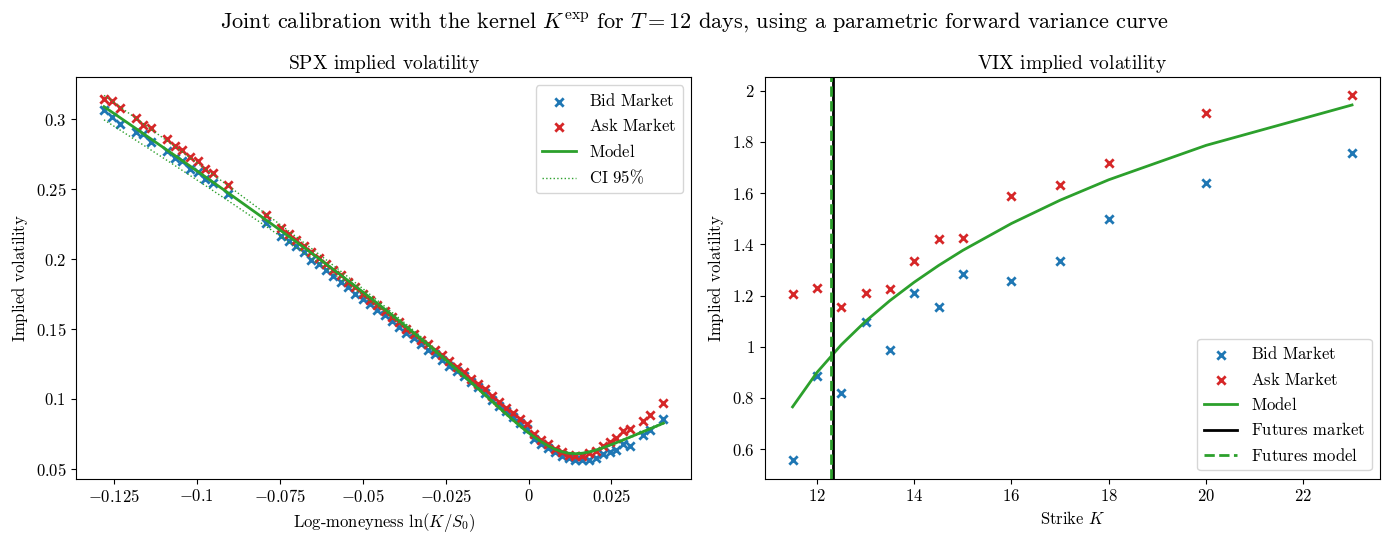

In [16]:
plot_IV_parametric_exp(result_NM, maturities[0], Y, SPX, VIX, N_quad, weights, y_mm)

#### I.2. $T = 19$

In [20]:
maturities = [19]
bounds = np.array([
    (-1, -0.3),      # rho
    (-0.2, 0.2),     # H
    (0, 1),          # alpha_0 
    (0, 1),          # alpha_1
    (0, 1),          # alpha_3 
    (0, 1),          # alpha_5 
    (0.0001, 0.1),   # a
    (0.0001, 3),     # b
    (0.0001, 0.1)    # c
])

M = 20000
n_steps_per_day = 20 

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
weights, y = load_quantization_gaussian(f"dim_1/{N}_1_nopti.txt")
y = y.ravel()
y_mm = moment_matching_gaussian_1D(weights, y, q=4)

strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [22]:
maxiter = 40
popsize = 12

In [24]:
result_DE, result_NM = calibration_procedure_exp(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                             strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, 
                                             gl_values, weights, y_mm, polish_DE=False)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 4428 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=6.519372e-02, Penalty=0.000000e+00
[Iter 10] | VIX: NMSE=6.564161e-02, Penalty=0.000000e+00
[Iter 10] | Futures: NMSE=2.159900e-01
[Iter 10] | Loss: NMSE=1.797529e-01
[Iter 10] | Penalty: NMSE=0.000000e+00
[Iter 20] | SPX: NMSE=3.519886e-02, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=1.057064e+00, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=1.650916e-01
[Iter 20] | Loss: NMSE=2.234511e-01
[Iter 20] | Penalty: NMSE=0.000000e+00
[Iter 30] | SPX: NMSE=6.045806e-01, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=3.028229e-01, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=1.284361e+00
[Iter 30] | Loss: NMSE=1.277043e+00
[Iter 30] | Penalty: NMSE=0.000000e+00
[Iter 40] | SPX: NMSE=8.660230e-02, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=3.615321e-01, Penalty=0.0000

In [26]:
result_DE.x

array([-0.75725625, -0.03221137,  0.65021304,  0.89250494,  0.63521755,
        0.01218466,  0.0104359 ,  1.20157138,  0.07005639])

In [27]:
result_NM.x

array([-0.77740832, -0.06449146,  0.31511561,  0.8341809 ,  0.08767634,
        0.01558663,  0.01158846,  1.02906057,  0.06843981])

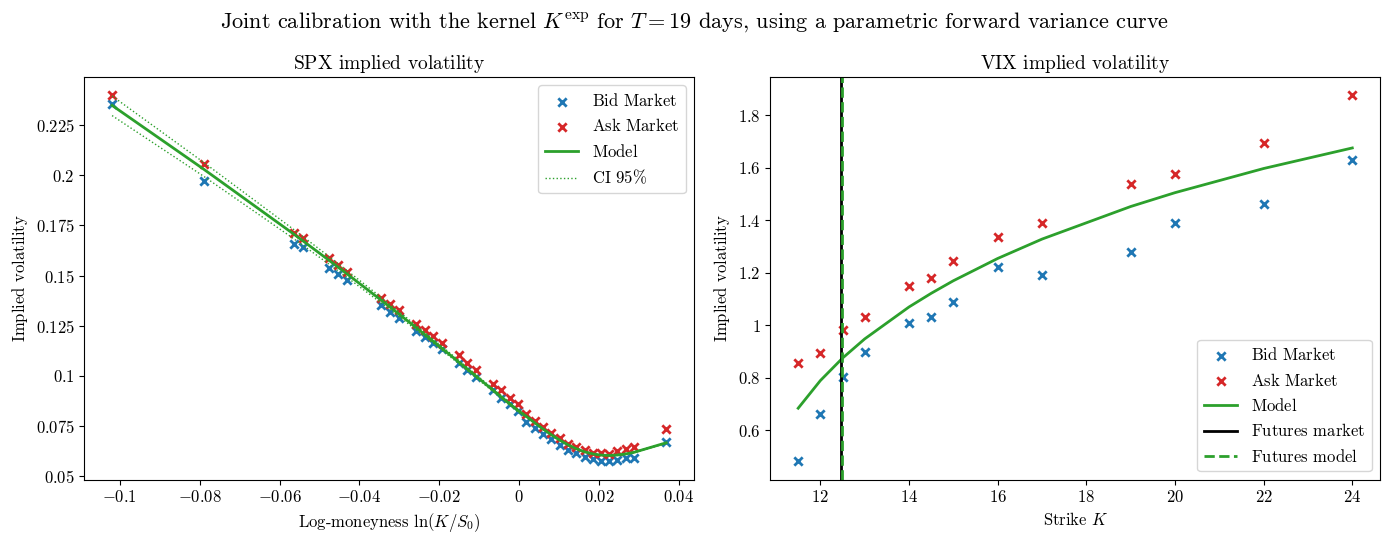

In [30]:
plot_IV_parametric_exp(result_NM, maturities[0], Y, SPX, VIX, N_quad, weights, y_mm, save=True)

#### I.3 $T=26$

In [36]:
maturities = [26]
bounds = np.array([
    (-1, -0.3),      # rho
    (-0.2, 0.2),     # H
    (0, 1),          # alpha_0 
    (0, 1),          # alpha_1
    (0, 1),          # alpha_3 
    (0, 1),          # alpha_5 
    (0.0001, 0.1),   # a
    (0.0001, 3),     # b
    (0.0001, 0.1)    # c
])

M = 20000
n_steps_per_day = 20 

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
weights, y = load_quantization_gaussian(f"dim_1/{N}_1_nopti.txt")
y = y.ravel()
y_mm = moment_matching_gaussian_1D(weights, y, q=4)

strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [38]:
maxiter = 40
popsize = 12 

In [40]:
result_DE, result_NM = calibration_procedure_exp(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                                 strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, gl_values, 
                                                 weights, y_mm, polish_DE=False)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 4428 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=4.796804e-02, Penalty=0.000000e+00
[Iter 10] | VIX: NMSE=1.038735e-01, Penalty=0.000000e+00
[Iter 10] | Futures: NMSE=2.098430e-01
[Iter 10] | Loss: NMSE=1.632769e-01
[Iter 10] | Penalty: NMSE=0.000000e+00
[Iter 20] | SPX: NMSE=5.365945e-02, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=9.954945e-01, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=1.874738e-01
[Iter 20] | Loss: NMSE=2.469458e-01
[Iter 20] | Penalty: NMSE=0.000000e+00
[Iter 30] | SPX: NMSE=4.407256e-01, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=7.050543e-02, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=1.188275e+00
[Iter 30] | Loss: NMSE=1.041914e+00
[Iter 30] | Penalty: NMSE=0.000000e+00
[Iter 40] | SPX: NMSE=6.669151e-02, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=3.708872e-01, Penalty=0.0000

In [42]:
result_DE.x

array([-0.76900035, -0.02062601,  0.83450987,  0.83386871,  0.67294432,
        0.01078504,  0.01367014,  2.21398004,  0.02979677])

In [43]:
result_NM.x 

array([-0.76714752, -0.04585467,  0.3271492 ,  0.6941309 ,  0.05169063,
        0.01769072,  0.01474114,  1.07381061,  0.03929257])

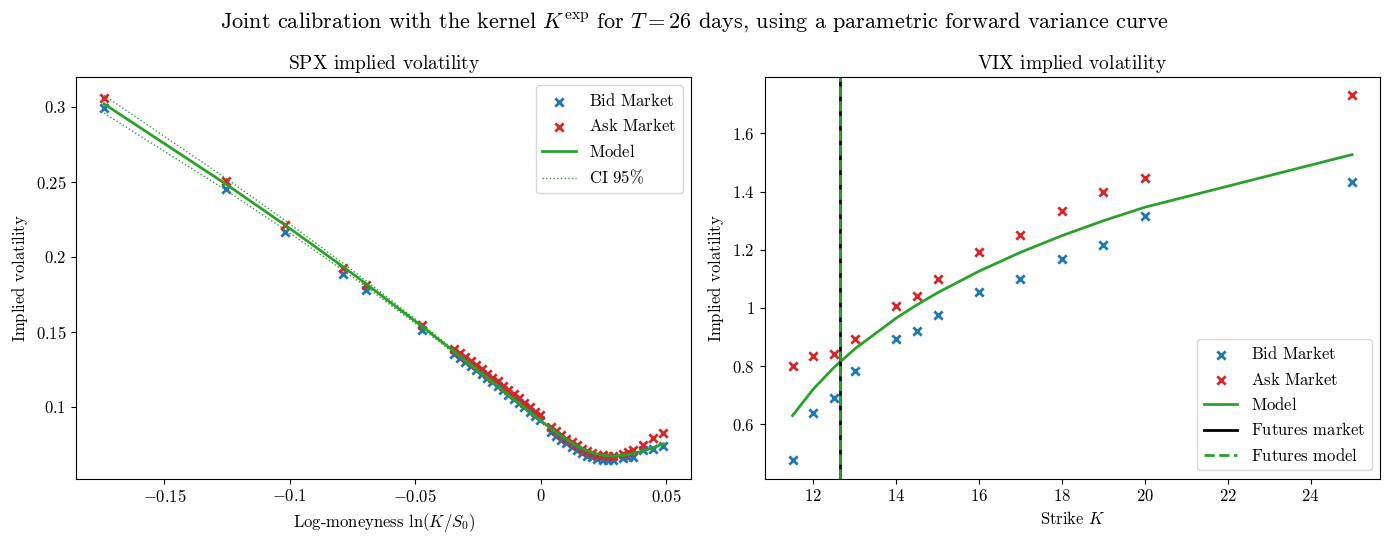

In [52]:
plot_IV_parametric_exp(result_NM, maturities[0], Y, SPX, VIX, N_quad, weights, y_mm, save=True)

#### I.4 $T=33$

In [54]:
maturities = [33]
bounds = np.array([
    (-1, -0.3),      # rho
    (-0.2, 0.2),     # H
    (0, 1),          # alpha_0 
    (0, 1),          # alpha_1
    (0, 1),          # alpha_3 
    (0, 1),          # alpha_5 
    (0.0001, 0.1),   # a
    (0.0001, 3),     # b
    (0.0001, 0.1)    # c
])

M = 20000
n_steps_per_day = 20 

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
weights, y = load_quantization_gaussian(f"dim_1/{N}_1_nopti.txt")
y = y.ravel()
y_mm = moment_matching_gaussian_1D(weights, y, q=4)

strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [56]:
maxiter = 40
popsize = 12 

In [58]:
result_DE, result_NM = calibration_procedure_exp(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                                 strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, 
                                                 gl_values, weights, y_mm, polish_DE=False)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 4428 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=4.606405e-02, Penalty=0.000000e+00
[Iter 10] | VIX: NMSE=1.062241e-01, Penalty=0.000000e+00
[Iter 10] | Futures: NMSE=2.158443e-01
[Iter 10] | Loss: NMSE=1.646086e-01
[Iter 10] | Penalty: NMSE=0.000000e+00
[Iter 20] | SPX: NMSE=4.455425e-02, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=5.855632e-01, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=2.041279e-01
[Iter 20] | Loss: NMSE=2.051746e-01
[Iter 20] | Penalty: NMSE=0.000000e+00
[Iter 30] | SPX: NMSE=3.079015e-01, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=2.091493e-01, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=1.147868e+00
[Iter 30] | Loss: NMSE=9.027503e-01
[Iter 30] | Penalty: NMSE=0.000000e+00
[Iter 40] | SPX: NMSE=8.799401e-02, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=1.758386e-01, Penalty=0.0000

In [60]:
result_DE.x

array([-0.68502914,  0.0813409 ,  0.18364019,  0.90284571,  0.67059293,
        0.02124089,  0.01308328,  0.64656371,  0.07448255])

In [62]:
result_NM.x

array([-0.7697427 ,  0.09065365,  0.10559953,  0.69872087,  0.11449703,
        0.0470597 ,  0.01383279,  0.44703419,  0.08706312])

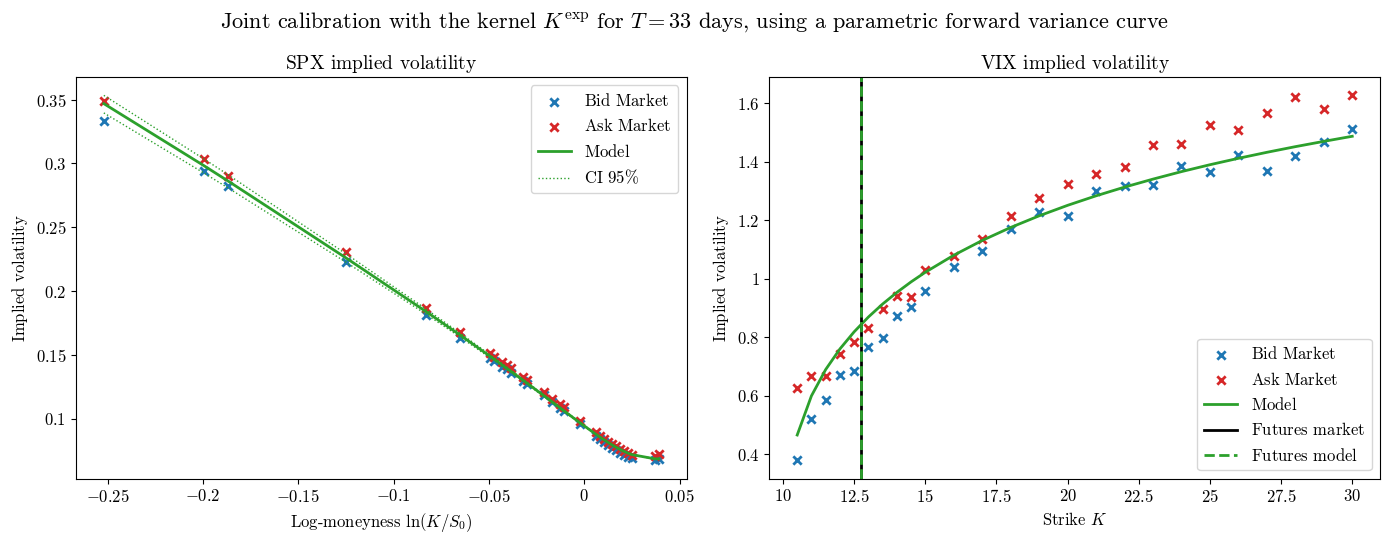

In [70]:
plot_IV_parametric_exp(result_NM, maturities[0], Y, SPX, VIX, N_quad, weights, y_mm)

### II. Kernel $K^\text{shift}$ 

In [29]:
bounds = np.array([
    (-1, -0.5),      # rho
    (-0.80, -0.65),  # H
    (0, 0.5),        # alpha_0 
    (0, 0.5),        # alpha_1
    (0, 0.1),        # alpha_3 
    (0, 1e-5),       # alpha_5 
    (0.0001, 0.05),  # a
    (0.0001, 0.8),   # b
    (0, 0.001)       # c
])

#### II.1 $T=12$

In [51]:
maturities = [12]

M = 5000
n_steps_per_day = 40

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
n_factors = 10

decomposition = get_optimal_decomposition("RECORD_QF.txt", N)
strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [53]:
maxiter = 40
popsize = 12 

In [55]:
result_DE, result_NM, results_NM = calibration_procedure_shift(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                                   strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, 
                                                   gl_values, decomposition, n_factors, polish_DE=False)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 4428 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=4.802743e-03, Penalty=0.000000e+00
[Iter 10] | VIX: NMSE=5.130491e-02, Penalty=0.000000e+00
[Iter 10] | Futures: NMSE=1.936208e-04
[Iter 10] | Loss: 3.061009e-02
[Iter 10] | Penalty: 0.000000e+00
[Iter 20] | SPX: NMSE=4.336802e-02, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=8.740861e-01, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=2.515582e-01
[Iter 20] | Loss: 6.816576e-01
[Iter 20] | Penalty: 0.000000e+00
[Iter 30] | SPX: NMSE=9.922579e-02, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=3.178335e-01, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=3.721577e-01
[Iter 30] | Loss: 5.558687e-01
[Iter 30] | Penalty: 0.000000e+00
[Iter 40] | SPX: NMSE=1.430531e-02, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=7.098969e-02, Penalty=0.000000e+00
[Iter 40] | Futures: NM

In [20]:
result_DE.x

array([-7.71897557e-01, -7.18645136e-01,  1.94663573e-01,  2.93466763e-01,
        9.78957382e-04,  4.67316894e-09,  1.65020130e-02,  8.09873216e-02,
        5.19943508e-04])

In [22]:
result_NM.x 

array([-7.60614047e-01, -7.03869032e-01,  4.94210897e-01,  8.88735260e-01,
        3.45919261e-03,  3.63368708e-08,  1.38917952e-02, -2.20785996e+00,
        1.27226537e-04])

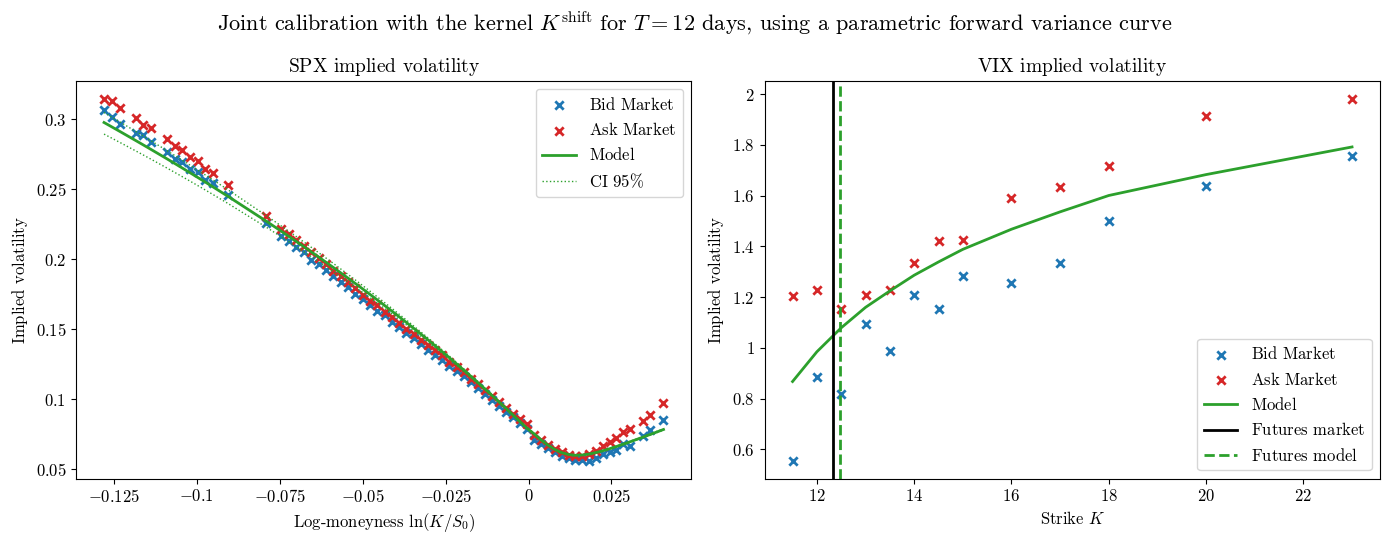

In [33]:
plot_IV_parametric_shift(result_NM, maturities[0], Y, SPX, VIX, N_quad, decomposition, n_factors)

#### II.2 $T=26$

In [37]:
maturities = [26]
bounds = np.array([
    (-1, -0.5),      # rho
    (-0.80, -0.65),  # H
    (0, 0.5),        # alpha_0 
    (0, 0.5),        # alpha_1
    (0, 0.1),      # alpha_3 
    (0, 1e-5),       # alpha_5 
    (0.0001, 0.05),  # a
    (0.0001, 0.8),   # b
    (0, 0.001)       # c
])

M = 10000
n_steps_per_day = 40

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
n_factors = 10 

decomposition = get_optimal_decomposition("RECORD_QF.txt", N)
strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [39]:
maxiter = 40
popsize = 12

In [41]:
result_DE, result_NM, results_NM = calibration_procedure_shift(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                                   strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, 
                                                   gl_values, decomposition, n_factors, polish_DE=False)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 4428 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=2.496104e-02, Penalty=0.000000e+00
[Iter 10] | VIX: NMSE=6.170527e-02, Penalty=0.000000e+00
[Iter 10] | Futures: NMSE=4.423915e-03
[Iter 10] | Loss: 5.935280e-02
[Iter 10] | Penalty: 0.000000e+00
[Iter 20] | SPX: NMSE=1.264443e-01, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=6.936739e-01, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=2.848049e-01
[Iter 20] | Loss: 7.011252e-01
[Iter 20] | Penalty: 0.000000e+00
[Iter 30] | SPX: NMSE=1.015786e-01, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=1.334268e-01, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=2.781594e-01
[Iter 30] | Loss: 3.908195e-01
[Iter 30] | Penalty: 0.000000e+00
[Iter 40] | SPX: NMSE=5.808977e-02, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=1.937303e-02, Penalty=0.000000e+00
[Iter 40] | Futures: NM

In [43]:
result_DE.x

array([-7.56359200e-01, -7.07257534e-01,  4.21356402e-02,  4.02470092e-01,
        9.64851852e-04,  1.40033886e-07,  1.86738823e-02,  2.32935307e-01,
        3.33490431e-04])

In [45]:
result_NM.x 

array([-7.73952151e-01, -7.10150214e-01,  2.30893800e-01,  4.63745682e-01,
        7.84016612e-04,  2.31000721e-07,  1.85581758e-02,  2.07790627e-01,
        6.07168379e-04])

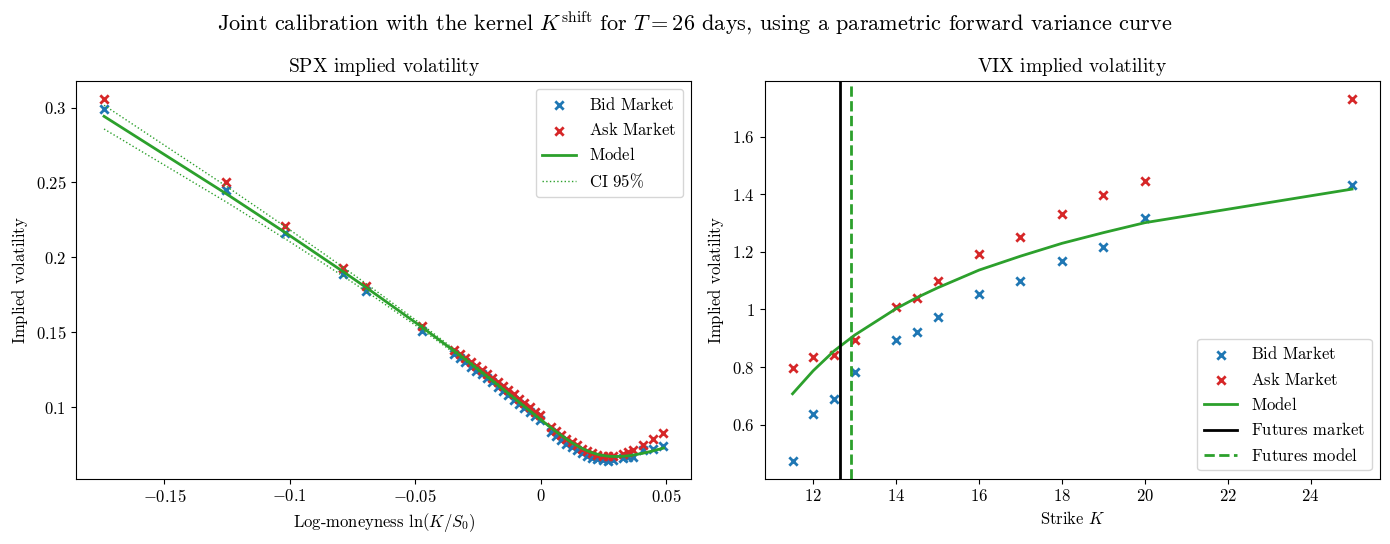

In [49]:
plot_IV_parametric_shift(result_NM, maturities[0], Y, SPX, VIX, N_quad, decomposition, n_factors, save=True)

### III. Kernel $K^\text{frac}$ 

In [67]:
bounds = np.array([
    (-1, -0.5),    # rho
    (0, 0.15),     # H
    (0, 1),        # alpha_0 
    (0, 1),        # alpha_1
    (0, 1),        # alpha_3 
    (0, 0.1),      # alpha_5 
    (0.0001, 0.05),# a
    (0.0001, 1),   # b
    (0, 0.001)     # c
])

#### III.1 $T=12$

In [85]:
maturities = [12]

M = 5000
n_steps_per_day = 100

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
n_factors = 10

decomposition = get_optimal_decomposition("RECORD_QF.txt", N)
strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [87]:
popsize = 20
maxiter = 12

In [89]:
result_DE, result_NM, results_NM = calibration_procedure_frac(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                                   strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, 
                                                   gl_values, decomposition, n_factors, polish_DE=False, nm_starts=2)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 2340 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=5.534659e-01, Penalty=6.400000e+03
[Iter 10] | VIX: NMSE=4.946767e-01, Penalty=1.100000e+03
[Iter 10] | Futures: NMSE=5.253049e-01
[Iter 10] | Loss: 1.023880e+00
[Iter 10] | Penalty: 1.582936e-01
[Iter 20] | SPX: NMSE=3.556899e-03, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=3.421784e-01, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=9.764910e-03
[Iter 20] | Loss: 4.265720e-02
[Iter 20] | Penalty: 0.000000e+00
[Iter 30] | SPX: NMSE=5.196779e-03, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=7.395968e-02, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=1.998611e-01
[Iter 30] | Loss: 1.125233e-01
[Iter 30] | Penalty: 0.000000e+00
[Iter 40] | SPX: NMSE=5.451864e-03, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=9.399569e-02, Penalty=6.000000e+02
[Iter 40] | Futures: NM

In [91]:
result_DE.x

array([-8.82079103e-01,  1.24515992e-01,  1.71539654e-01,  7.48662658e-01,
        7.03460960e-01,  5.75555094e-03,  1.98640872e-02,  2.27026848e-01,
        1.48507230e-04])

In [93]:
result_NM.x 

array([-8.57599410e-01,  1.33249491e-01,  4.34603950e-01,  9.90308052e-01,
        7.84585928e-01,  2.86587915e-03,  1.88214868e-02,  4.65164986e-01,
        5.54436525e-04])

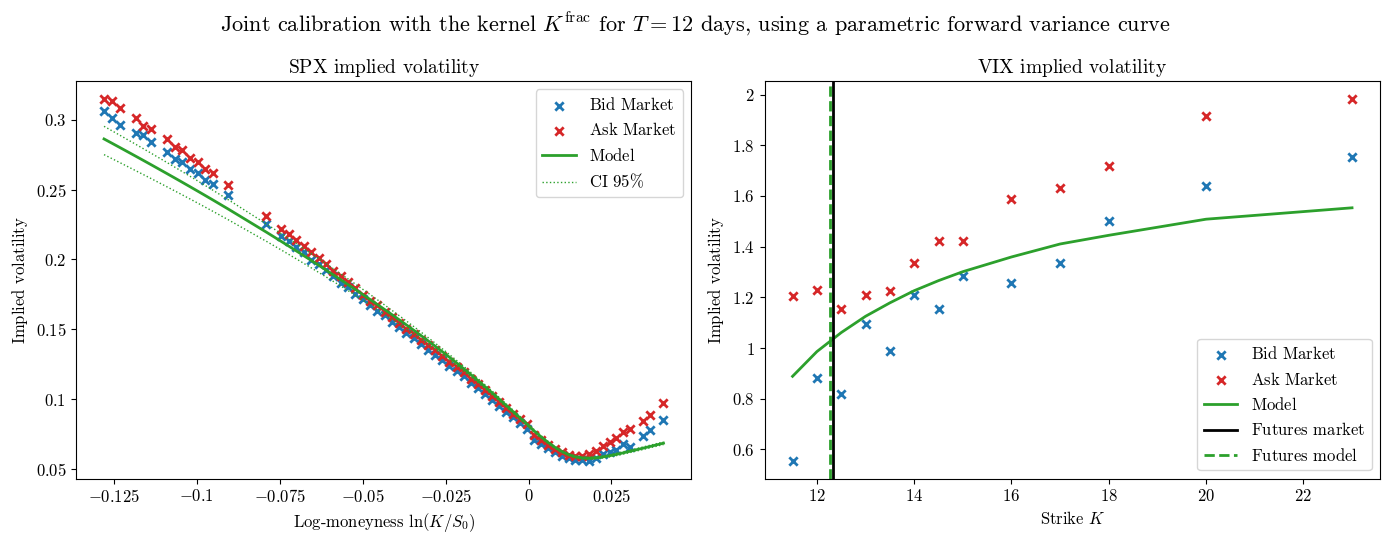

In [97]:
plot_IV_parametric_frac(result_NM, maturities[0], Y, SPX, VIX, N_quad, decomposition, n_factors)

#### III.2 $T=19$

In [10]:
maturities = [19]

M = 5000
n_steps_per_day = 65

n = maturities[0] * n_steps_per_day
Y = simulate_antithetic(M, n) 
N = 200
N_quad = 50
tau_gl, w_gl = gauss_legendre_interval(maturities[0]/365, 1/12, N_quad)
gl_values = [(tau_gl, w_gl)]
n_factors = 10

decomposition = get_optimal_decomposition("RECORD_QF.txt", N)
strikes_SPX, ivs_market_SPX, _, _, forwards_SPX, strikes_VIX, ivs_market_VIX, _, _, forwards_VIX = stripping_arrays(maturities, SPX, VIX)

In [12]:
popsize = 20
maxiter = 12

In [14]:
result_DE, result_NM, results_NM = calibration_procedure_frac(maxiter, popsize, bounds, strikes_SPX, ivs_market_SPX, forwards_SPX, 
                                                   strikes_VIX, ivs_market_VIX, forwards_VIX, M, Y, n_steps_per_day, maturities, 
                                                   gl_values, decomposition, n_factors, polish_DE=False, nm_starts=2)

____________________________________________________________

Step 1: Differential Evolution
____________________________________________________________

Approximately 2340 evaluations (if polish_DE=False).

[Iter 10] | SPX: NMSE=6.931495e-01, Penalty=3.100000e+03
[Iter 10] | VIX: NMSE=6.116850e-01, Penalty=9.000000e+02
[Iter 10] | Futures: NMSE=4.753478e-01
[Iter 10] | Loss: 1.140998e+00
[Iter 10] | Penalty: 1.490058e-01
[Iter 20] | SPX: NMSE=1.499067e-02, Penalty=0.000000e+00
[Iter 20] | VIX: NMSE=5.885233e-01, Penalty=0.000000e+00
[Iter 20] | Futures: NMSE=1.360082e-03
[Iter 20] | Loss: 7.452304e-02
[Iter 20] | Penalty: 0.000000e+00
[Iter 30] | SPX: NMSE=9.453378e-03, Penalty=0.000000e+00
[Iter 30] | VIX: NMSE=1.340237e-01, Penalty=0.000000e+00
[Iter 30] | Futures: NMSE=1.351108e-01
[Iter 30] | Loss: 9.041116e-02
[Iter 30] | Penalty: 0.000000e+00
[Iter 40] | SPX: NMSE=1.438852e-02, Penalty=0.000000e+00
[Iter 40] | VIX: NMSE=5.670535e-02, Penalty=2.000000e+02
[Iter 40] | Futures: NM

In [18]:
result_DE.x

array([-9.71733094e-01,  1.09838032e-01,  8.70591129e-01,  8.43130597e-01,
        9.93922348e-01,  1.93438602e-03,  2.00347447e-02,  3.68054377e-01,
        1.20152398e-04])

In [20]:
result_NM.x 

array([-8.45120756e-01,  1.17638567e-01,  9.05933112e-01,  9.16826377e-01,
        9.51691093e-01,  1.89423882e-03,  1.98538792e-02,  3.76755363e-01,
        1.21029868e-04])

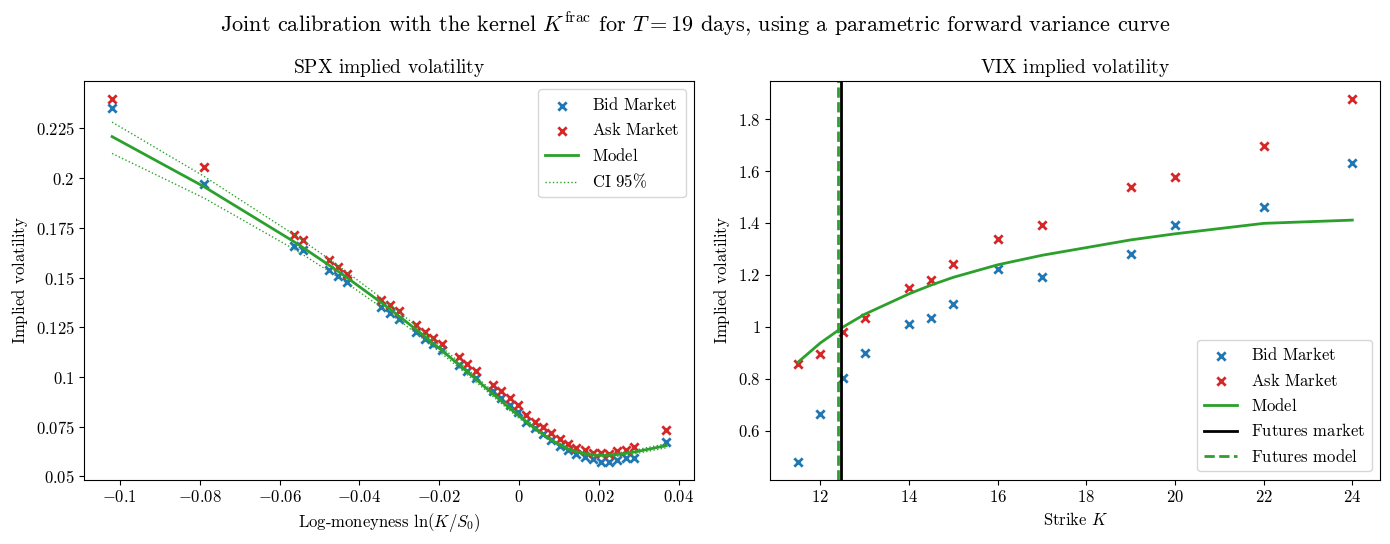

In [24]:
plot_IV_parametric_frac(result_NM, maturities[0], Y, SPX, VIX, N_quad, decomposition, n_factors)